In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [3]:
raw_data = pd.read_csv("C:\\Users\\Aastha's\\Downloads\\Compressed\\spam_ham_dataset.csv.zip")

In [6]:
print(raw_data)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [8]:

mail_data = raw_data.fillna('')

In [10]:
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
#spam mail as 1 and ham as 0 
mail_data.loc[mail_data['label']=='spam','label',]=1
mail_data.loc[mail_data['label']=='ham','label',]=0

In [14]:
#seperating data as label and text 
x = mail_data['text']
y = mail_data['label']

In [16]:
#train test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)

In [18]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)


In [19]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [22]:
print(x_train_features)
print("\n------------------------------------------")
print(x_test_features)

  (0, 26225)	0.06435662543764843
  (0, 6550)	0.12614414618035388
  (0, 18325)	0.13046476892405612
  (0, 12822)	0.1797429923945515
  (0, 11005)	0.11686695196131618
  (0, 4318)	0.21702975691004944
  (0, 33146)	0.283205657094249
  (0, 32521)	0.15899629516068414
  (0, 15569)	0.3141989155708546
  (0, 14549)	0.16860493277148314
  (0, 15568)	0.17176933517192858
  (0, 24906)	0.1271527161007438
  (0, 34688)	0.20145708175181337
  (0, 33147)	0.1797429923945515
  (0, 24292)	0.24092884590713387
  (0, 28296)	0.276171197088413
  (0, 16994)	0.16853292714253953
  (0, 7814)	0.29877531509977034
  (0, 20745)	0.20145708175181337
  (0, 19382)	0.2778343723831967
  (0, 10182)	0.24941495006970868
  (0, 34867)	0.1343161126456533
  (0, 4313)	0.26092953784811224
  (0, 34958)	0.02369781620823394
  (1, 11936)	0.24862825078081016
  :	:
  (3618, 35810)	0.26567868637419373
  (3618, 12626)	0.07185153628318423
  (3618, 27004)	0.07934022496817664
  (3618, 221)	0.1470761619176687
  (3618, 790)	0.1445494337628669
  (3618, 

In [24]:
model = LogisticRegression()


In [26]:
# training the Logistic Regression model with the training data
model.fit(x_train_features, y_train)

LogisticRegression()

In [28]:
# prediction on training data

prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9955788891959104


In [30]:
# prediction on test data

prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9877577319587629


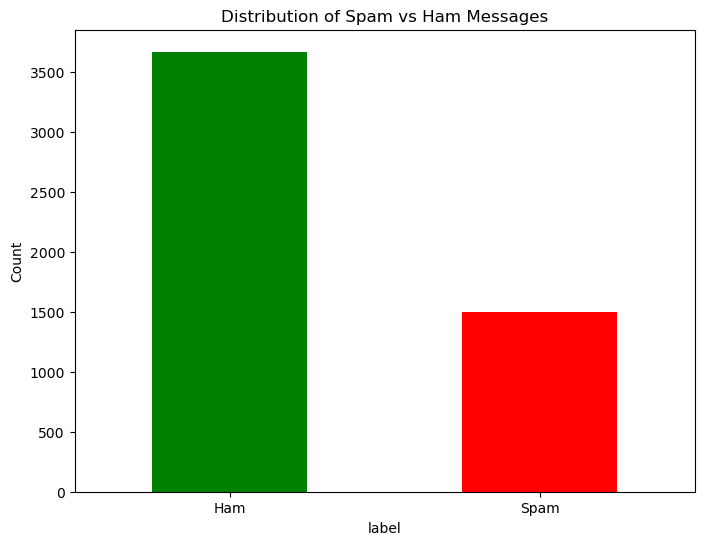

In [32]:
import matplotlib.pyplot as plt

category_counts = mail_data['label'].value_counts()

plt.figure(figsize=(8,6))
category_counts.plot(kind='bar', color=['green', 'red'])

plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)

plt.show()


In [33]:
input_mail = ["Congratulations! ayush for securing gold medal in btech."]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Spam mail
